Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


 This is formatted as code
Defining the path for train and test images

In [2]:
data_dir_train = pathlib.Path("/content/drive/MyDrive/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Test')

Counting the train and test images

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Defining the path list

In [5]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]

Defining the list of the skin cancer classes

In [6]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train,'*', '*.jpg'))]

creating a dictionary to prepare a dataframe

*   List item
*   List item



In [7]:
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

Load using keras preprocessing

Defining the batch size and the image height and width

In [4]:

batch_size = 32
img_height = 180
img_width = 180

Train Dataset

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


Validation Dataset


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


CLass names of train data set

In [10]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualising the data

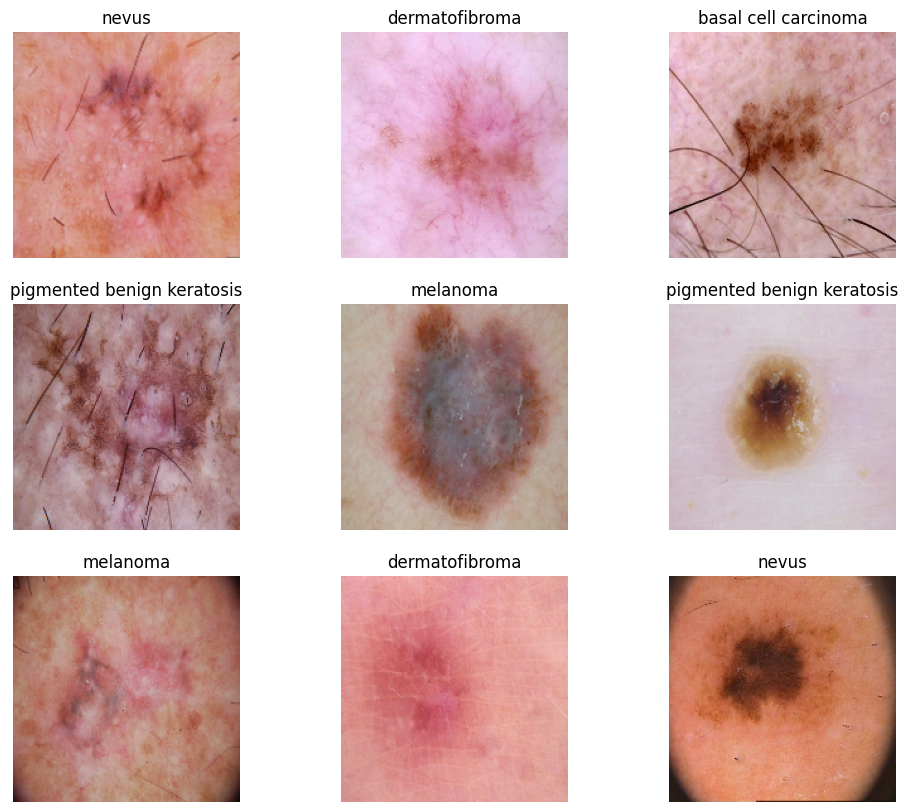

In [ ]:
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.


AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
     

In [ ]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

BUilding a sequential model with  rescaling and 3 conv layers and 2 dense layers with softmax as output activation

In [ ]:
model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
     # maxpooling layer
  layers.MaxPooling2D(),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output dense layer
  layers.Dense(num_classes,activation='softmax')
])

COmpiling the model with optimizer adam and loss sparse_categorical_crossentropy

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model with 20 epochs

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 969s 2s/step - loss: 1.8132 - accuracy: 0.3215 - val_loss: 1.4314 - val_accuracy: 0.4507
Epoch 2/20
169/169 [==============================] - 195s 1s/step - loss: 1.4309 - accuracy: 0.4724 - val_loss: 1.3534 - val_accuracy: 0.4959
Epoch 3/20
169/169 [==============================] - 201s 1s/step - loss: 1.2309 - accuracy: 0.5419 - val_loss: 1.1095 - val_accuracy: 0.5841
Epoch 4/20
169/169 [==============================] - 191s 1s/step - loss: 1.0146 - accuracy: 0.6333 - val_loss: 1.0396 - val_accuracy: 0.6390
Epoch 5/20
169/169 [==============================] - 196s 1s/step - loss: 0.8293 - accuracy: 0.7019 - val_loss: 0.9148 - val_accuracy: 0.6805
Epoch 6/20
169/169 [==============================] - 203s 1s/step - loss: 0.6667 - accuracy: 0.7615 - val_loss: 0.8471 - val_accuracy: 0.7087
Epoch 7/20
169/169 [==============================] - 199s 1s/step - loss: 0.5311 - accuracy: 0.8094 - val_loss: 0.8273 - val_accuracy: 0.7213

Visualising the model

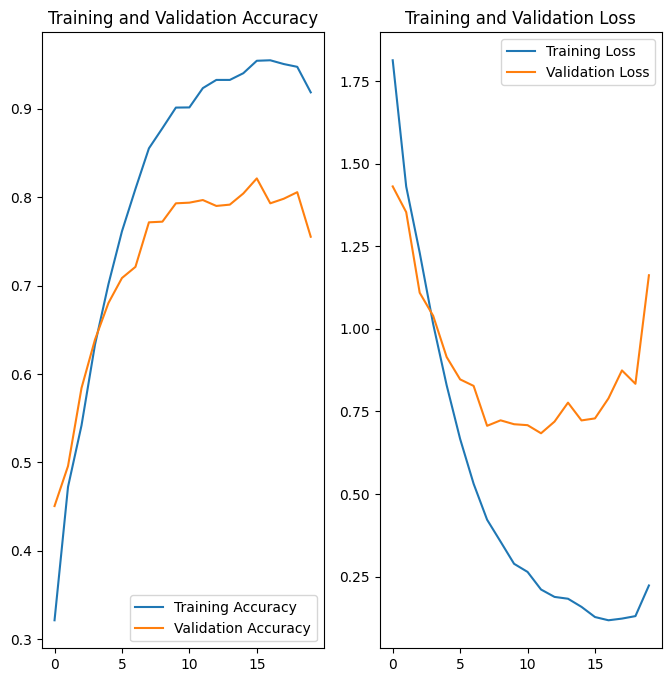

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

 model is overfitting the train accuracy is 90% and the validation accuracy is only 55%.Less number of images may have led to this overfitting as lesser number of data make it learn the images better


# To handle the overfitting scenario above we can add some dynamic data augmenttaion like
# - Random flipping
# - Random rotaion
# - Random zoom


In [ ]:

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1)
])

Visualizing the augmented data

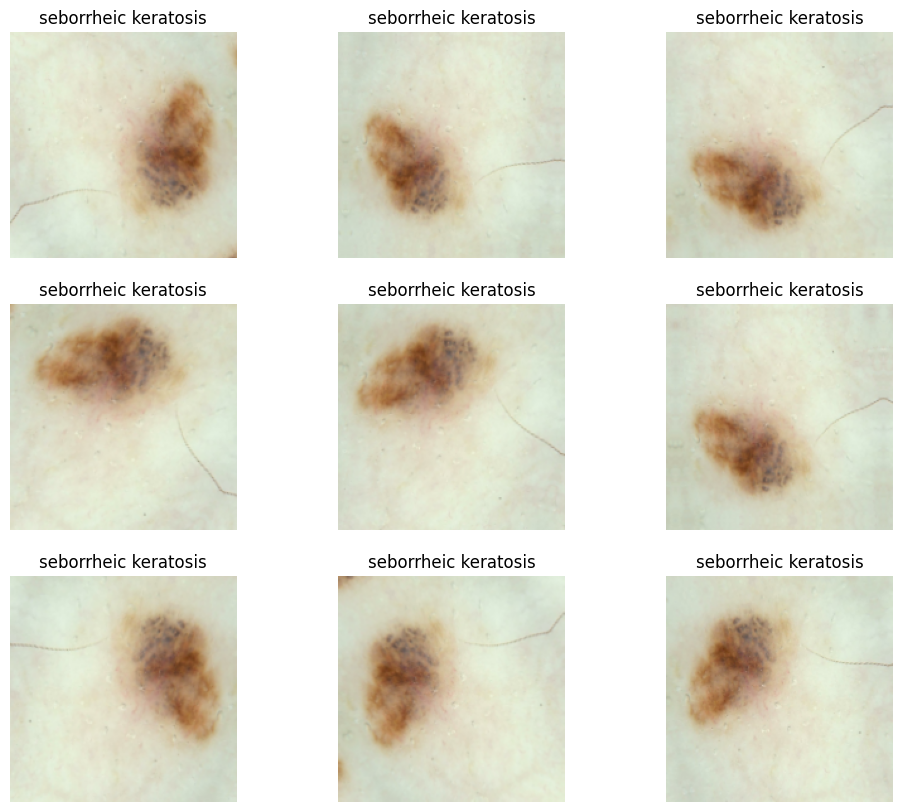

In [ ]:
plt.figure(figsize=(12, 10))
for images, labels in train_ds.take(1):
    for i in range(num_classes):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")
plt.show()

Create the model, compile and train the model

Creating the model

In [ ]:

model = Sequential([
    # data augmentation layer
  data_augmentation,
    # Rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpoolig layer
  layers.MaxPooling2D(),
    # Dropout
  layers.Dropout(0.25),
    # 2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
  #Dropout
  layers.Dropout(0.25),
    # 3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    #Dropout
  layers.Dropout(0.25),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output layer
  layers.Dense(num_classes,activation='softmax')
])

Compiling the model2

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Summary of model2

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

Training of model 2

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 248s 1s/step - loss: 2.3059 - accuracy: 0.1407 - val_loss: 2.1861 - val_accuracy: 0.1386
Epoch 2/20
169/169 [==============================] - 245s 1s/step - loss: 1.9663 - accuracy: 0.2233 - val_loss: 1.9494 - val_accuracy: 0.2350
Epoch 3/20
169/169 [==============================] - 240s 1s/step - loss: 1.7590 - accuracy: 0.3131 - val_loss: 1.7418 - val_accuracy: 0.3462
Epoch 4/20
169/169 [==============================] - 240s 1s/step - loss: 1.5801 - accuracy: 0.3859 - val_loss: 1.6397 - val_accuracy: 0.4085
Epoch 5/20
169/169 [==============================] - 245s 1s/step - loss: 1.4811 - accuracy: 0.4361 - val_loss: 1.5176 - val_accuracy: 0.4040
Epoch 6/20
169/169 [==============================] - 244s 1s/step - loss: 1.3753 - accuracy: 0.4769 - val_loss: 1.4970 - val_accuracy: 0.4455
Epoch 7/20
169/169 [==============================] - 245s 1s/step - loss: 1.3285 - accuracy: 0.4811 - val_loss: 1.2814 - val_accuracy: 0.5137

VIsualization of model2

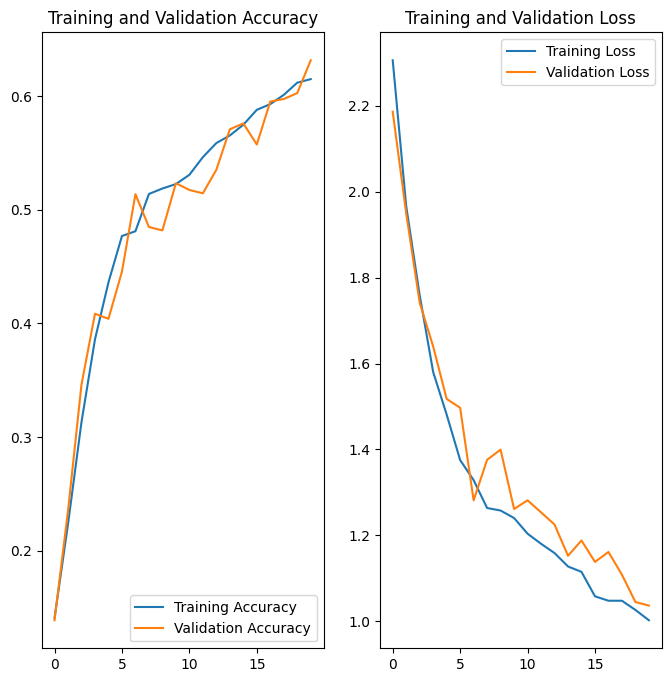

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

There has been a considerable improvement now as compared to the previous model as we can see from the train and validation accuracy that the model overfitting has been handled, but the model performance is not so good only 62% train and 62% validation accuracy
One reason could be class imbalance
Lets find the distribution of classes in the training dataset.


In [ ]:
image_dict = {}
for classname in class_names:
    image_dict[classname] = len(list(data_dir_train.glob(classname+'/*.jpg')))
print(image_dict)

{'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 472, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}


Detecting the class imbalance

creating the dictionary and dataframe of original train data

In [ ]:
df = pd.DataFrame()
counts = list(image_dict.values())
df['class'] = class_names
df['count'] = counts

In [ ]:
df.head(10)

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,472
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


- Which class has the least number of samples?

seborrheic keratosis	has the least number of samples

- Which classes dominate the data in terms proportionate number of samples?

melanoma followed by basal cell carcinnoma has the maximum number of samples

 Rectify the class imbalance
Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [11]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [13]:
path_to_training_dataset="/content/drive/MyDrive/Train/"
#data_dir_train = pathlib.Path('gdrive/My Drive/colab_dataset/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/')
## We are adding 500 samples per class to make sure that none of the classes are sparse.
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E6777423FA0>: 100%|██████████| 500/500 [00:18<00:00, 27.04 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E6777423F70>: 100%|██████████| 500/500 [00:17<00:00, 28.60 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E677752FDF0>: 100%|██████████| 500/500 [00:20<00:00, 24.82 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E6777465660>: 100%|██████████| 500/500 [01:23<00:00,  5.98 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7E67772AF880>: 100%|██████████| 500/500 [01:28<00:00,  5.65 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E67772B3A00>: 100%|██████████| 500/500 [00:17<00:00, 28.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E677743C400>: 100%|██████████| 500/500 [00:38<00:00, 12.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E677748F0D0>: 100%|██████████| 500/500 [00:17<00:00, 29.11 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E677C7DB850>: 100%|██████████| 500/500 [00:17<00:00, 27.80 Samples/s]


Total number of images

In [14]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [15]:
from glob import glob

Checking the plth list of new data

In [16]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]


In [ ]:
path_list

['/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_26359bd1-ebdf-4ca3-b707-e25a730e2bbc.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_4e9d3400-4e5b-4362-b653-7bf1635079c7.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033151.jpg_6a4f0990-fc36-4522-93ec-a204ae59373f.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0032135.jpg_e5659d40-a52b-4133-b02d-dc5c8603542f.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028063.jpg_ac7478ba-8584-4932-983b-74d73353d5b8.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026905.jpg_c6729d5f-59b0-43ba-843f-66fe9101915e.jpg',
 '/content/drive/MyDrive/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027452.jpg_e7fca4c3-7e9d-4bea-b87d-48fddc62bca4.jpg',

Calsses of new data

In [17]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [18]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(lesion_list_new)

['seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic keratosis', 'seborrheic ker

creating dictionoary for new data frame of the new data

In [19]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-19-c8cad09de6b6>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


Checking the count of the samples

In [20]:
new_df['Label'].value_counts()


pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

Prepraring the model and validation

In [21]:
batch_size = 32
img_height = 180
img_width = 180

In [22]:
# getting the trainig dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [23]:
# getting the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels='inferred',
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [24]:
# checking the class names
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [25]:
# Autotune
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [26]:
# creating the sequential model with rescaling, 3 conv, 3 maxpooling, 3 dropouts and 2 dense layers
model = Sequential([
    # rescaling layer
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    # 1st conv layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    #2nd conv layer
  layers.Conv2D(32, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    #3rd conv layer
  layers.Conv2D(64, 3, padding='same', activation='relu'),
    # maxpooling layer
  layers.MaxPooling2D(),
    # dropout layer
  layers.Dropout(0.25),
    # flatten
  layers.Flatten(),
    # 1st dense layer
  layers.Dense(128, activation='relu'),
    # output layer with softmax
  layers.Dense(num_classes,activation='softmax')
])

In [27]:
# compiling the model with adam optimizer and sparse_categorical_crossentropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 90, 90, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

In [29]:
# trainig the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 50s 73ms/step - loss: 2.2770 - accuracy: 0.1493 - val_loss: 2.1415 - val_accuracy: 0.1997
Epoch 2/30
169/169 [==============================] - 5s 28ms/step - loss: 1.8555 - accuracy: 0.2830 - val_loss: 1.7141 - val_accuracy: 0.3534
Epoch 3/30
169/169 [==============================] - 5s 28ms/step - loss: 1.5240 - accuracy: 0.4180 - val_loss: 1.4246 - val_accuracy: 0.4603
Epoch 4/30
169/169 [==============================] - 5s 29ms/step - loss: 1.3744 - accuracy: 0.4759 - val_loss: 1.4322 - val_accuracy: 0.4358
Epoch 5/30
169/169 [==============================] - 5s 28ms/step - loss: 1.2626 - accuracy: 0.5243 - val_loss: 1.3591 - val_accuracy: 0.4885
Epoch 6/30
169/169 [==============================] - 5s 29ms/step - loss: 1.2069 - accuracy: 0.5556 - val_loss: 1.2098 - val_accuracy: 0.5353
Epoch 7/30
169/169 [==============================] - 5s 29ms/step - loss: 1.0552 - accuracy: 0.6141 - val_loss: 1.1357 - val_accuracy: 0.573

Validating the model with graph

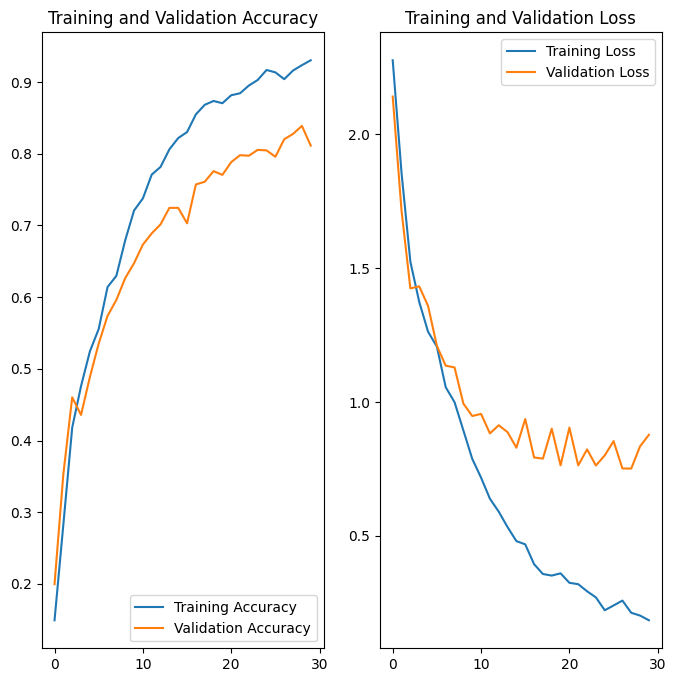

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Finally the after rectifying the class imbalance we observe the training dataset has 91% and validation has 81% . Both the performance and theoverfitting has been addressed